## Observations and Insights 

In [3]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats as st

# Study data files

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_merge = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
mouse_merge
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
mouse_merge['Mouse ID'].count()

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_merge1 = mouse_merge.groupby('Mouse ID', as_index=False).agg({'Timepoint':['count','max']})
mouse_merge1

Mouse ID Timepoint    
                 count max
0       a203        10  45
1       a251        10  45
2       a262        10  45
3       a275        10  45
4       a366         7  30
..       ...       ...  ..
244     z435         3  10
245     z578        10  45
246     z581        10  45
247     z795        10  45
248     z969        10  45

[249 rows x 3 columns]

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_merge2 = mouse_merge.groupby('Mouse ID', as_index=False).max()
mouse_merge2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,45.000000,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_merge3 = mouse_merge.drop_duplicates(subset='Mouse ID',keep='last').reset_index(drop=True)
mouse_merge3

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [8]:
# Checking the number of mice in the clean DataFrame.
mouse_merge3['Mouse ID'].count()

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mouse_mean = mouse_merge3.groupby('Drug Regimen', as_index=False)['Tumor Volume (mm3)'].mean()
mouse_meanr = mouse_mean.rename(columns={'Tumor Volume (mm3)' : 'Mean'})
mouse_med = mouse_merge3.groupby('Drug Regimen', as_index=False)['Tumor Volume (mm3)'].median()
mouse_medr = mouse_med.rename(columns={'Tumor Volume (mm3)' : 'Median'})
mouse_var = mouse_merge3.groupby('Drug Regimen', as_index=False)['Tumor Volume (mm3)'].var()
mouse_varr = mouse_var.rename(columns={'Tumor Volume (mm3)' : 'Variance'})
mouse_std = mouse_merge3.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().reset_index(drop=False)
mouse_stdr = mouse_std.rename(columns={'Tumor Volume (mm3)' : 'STD'})
mouse_sem = mouse_merge3.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().reset_index(drop=False)
mouse_semr = mouse_sem.rename(columns={'Tumor Volume (mm3)':'SEM'})

sum_med = pd.merge(mouse_meanr, mouse_medr, on='Drug Regimen', how='outer')
sum_var = pd.merge(sum_med, mouse_varr, on='Drug Regimen', how='outer')
sum_std = pd.merge(sum_var, mouse_stdr, on='Drug Regimen', how='outer')
sum_stats = pd.merge(sum_std, mouse_semr, on='Drug Regimen', how='outer')

sum_stats


,Drug Regimen,Mean,Median,Variance,STD,SEM
0,Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
1,Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
2,Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
3,Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
4,Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
5,Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
6,Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
7,Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
8,Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056
9,Zoniferol,59.181258,61.840058,76.862027,8.767099,1.753420


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_merge3r = mouse_merge3.rename(columns={'Tumor Volume (mm3)':'Tumor_volume_mm3'})
drug_regimen = mouse_merge3r.groupby('Drug Regimen', as_index=False).Tumor_volume_mm3.agg(['mean','median','var','std','sem','count'])
drug_regimen

,mean,median,var,std,sem,count
Drug Regimen,,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038,25
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114,25
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591,25
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184,25
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417,25
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934,25
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521,25
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308,25
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056,24


## Bar and Pie Charts

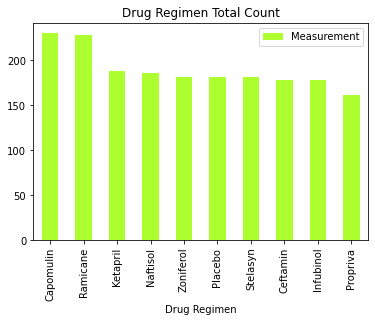

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

mm_bar = mouse_merge.groupby('Drug Regimen', as_index=False).count()
mm_bar = mm_bar.rename(columns={'Mouse ID':'Measurement'})
mm_bar = mm_bar.sort_values(by='Measurement', ascending=False)
mm_bar.plot.bar(x='Drug Regimen', y='Measurement', title='Drug Regimen Total Count', color='greenyellow')


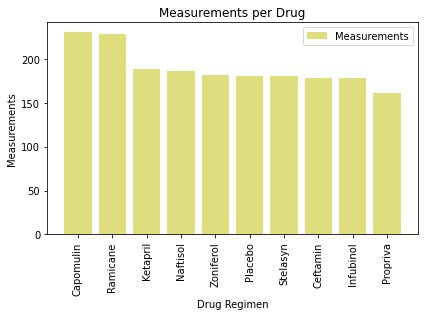

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = mm_bar['Drug Regimen'].tolist()
y_axis = mm_bar['Measurement'].tolist()

#Another way to solve it

#plt.figure(figsize=(20,3))
#plt.bar(x_axis, y_axis, label = 'Measurements', color = 'y', alpha = 0.45, align = 'center')
#plt.xticks(mm_bar['Drug Regimen'], mm_bar['Drug Regimen'], rotation='vertical')

plt.figure(figsize=(6, 4.5))
plt.bar(x_axis, y_axis, label = 'Measurements', color = 'y', alpha = .5, align = 'center')
plt.xlabel('Drug Regimen')
plt.ylabel('Measurements')
plt.title('Measurements per Drug')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

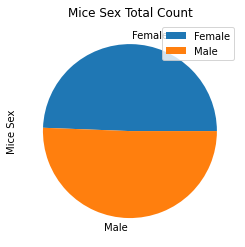

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mm_pie = mouse_merge.groupby('Sex').count()
mm_pie = mm_pie.rename(columns={'Mouse ID':'Mice Sex'})
mm_pie.plot.pie(y='Mice Sex', title='Mice Sex Total Count')

([<matplotlib.patches.Wedge at 0x1ed4c7f0be0>,
 [Text(-1.0997996703027118, 0.02099250347258563, 'Female'),
  Text(1.0997996703027118, -0.02099250347258625, 'Male')],
 [Text(-0.5998907292560246, 0.01145045643959216, '49.4%'),
  Text(0.5998907292560246, -0.011450456439592499, '50.6%')])

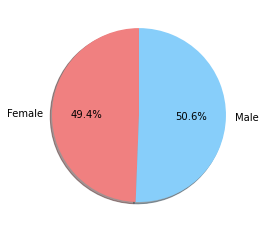

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mm_sex = mouse_merge.groupby('Sex', as_index=False).count()
label = mm_sex['Sex'].tolist()
number = mm_sex['Mouse ID'].tolist()
color = ['lightcoral', 'lightskyblue']


plt.pie(number, labels=label, colors=color,
       autopct='%1.1f%%', shadow=True, startangle=90)
               

## Quartiles, Outliers and Boxplots

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
qob = pd.concat([mouse_merge3[mouse_merge3['Drug Regimen']=='Capomulin'], mouse_merge3[mouse_merge3['Drug Regimen']=='Ramicane'],
                mouse_merge3[mouse_merge3['Drug Regimen']=='Infubinol'],mouse_merge3[mouse_merge3['Drug Regimen']=='Ceftamin']])
qob = qob.reset_index(drop=True)
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [86]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = qob['Drug Regimen'].tolist()
treatments

# Create empty list to fill with tumor vol data (for plotting)
tv = qob['Tumor Volume (mm3)']
tv

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = tv.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print('The general info of the four drugs is: ')
print(f"The lower quartile of tv is: {lowerq}")
print(f"The upper quartile of tv is: {upperq}")
print(f"The interquartile range of tv is: {iqr}")
print(f"The the median of tv is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print('-----------------------------------------------')

    # Locate the rows which contain mice on each drug and get the tumor volumes
cp = []
rm = []
inf = []
ce = []

row = 0

for drg in qob['Drug Regimen']:
    if drg == 'Capomulin':
        cp.append(qob.loc[row,'Tumor Volume (mm3)'])
    elif drg == 'Ramicane':
        rm.append(qob.loc[row, 'Tumor Volume (mm3)'])
    elif drg == 'Infubinol':
        inf.append(qob.loc[row, 'Tumor Volume (mm3)'])
    elif drg == 'Ceftamin':
        ce.append(qob.loc[row, 'Tumor Volume (mm3)'])
        
    row += 1
    
cp_df = pd.DataFrame({'Capomulin - Tumor Volume': cp})
rm_df = pd.DataFrame({'Ramicane - Tumor Volume': rm})
inf_df = pd.DataFrame({'Infubinol - Tumor Volume': inf})
cd_df = pd.DataFrame({'Ceftamin - Tumor Volume': ce})

cp_df
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

quartiles =cp_df['Capomulin - Tumor Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print('The info of Capomulin is: ')
print(f"The lower quartile of tv is: {lowerq}")
print(f"The upper quartile of tv is: {upperq}")
print(f"The interquartile range of tv is: {iqr}")
print(f"The the median of tv is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")  
print('-----------------------------------------------')
    
#----- Next one

quartiles = rm_df['Ramicane - Tumor Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print('The info of Ramicane is: ')    
print(f"The lower quartile of tv is: {lowerq}")
print(f"The upper quartile of tv is: {upperq}")
print(f"The interquartile range of tv is: {iqr}")
print(f"The the median of tv is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")  
print('-----------------------------------------------')

#---- next one

quartiles = inf_df['Infubinol - Tumor Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print('The info of Infubinol is: ')    
print(f"The lower quartile of tv is: {lowerq}")
print(f"The upper quartile of tv is: {upperq}")
print(f"The interquartile range of tv is: {iqr}")
print(f"The the median of tv is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print('-----------------------------------------------')

#----next one

quartiles = cd_df['Ceftamin - Tumor Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print('The info of Ceftamin is: ')    
print(f"The lower quartile of tv is: {lowerq}")
print(f"The upper quartile of tv is: {upperq}")
print(f"The interquartile range of tv is: {iqr}")
print(f"The the median of tv is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")    

The general info of the four drugs is: 
The lower quartile of tv is: 37.187743802499995
The upper quartile of tv is: 59.930261755000004
The interquartile range of tv is: 22.74251795250001
The the median of tv is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.
-----------------------------------------------
The info of Capomulin is: 
The lower quartile of tv is: 32.37735684
The upper quartile of tv is: 40.1592203
The interquartile range of tv is: 7.781863460000004
The the median of tv is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-----------------------------------------------
The info of Ramicane is: 
The lower quartile of tv is: 31.56046955
The upper quartile of tv is: 40.65900627
The interquartile range of tv is: 9.098536719999998
The the median of tv is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be ou

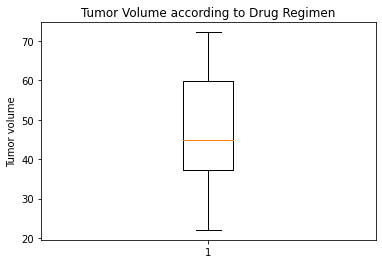

In [91]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
import numpy as np 

dreg = np.concatenate((cp_df, rm_df, inf_df, cd_df))
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume according to Drug Regimen')
ax1.set_ylabel('Tumor volume')
ax1.boxplot(dreg)
plt.show()

## Line and Scatter Plots

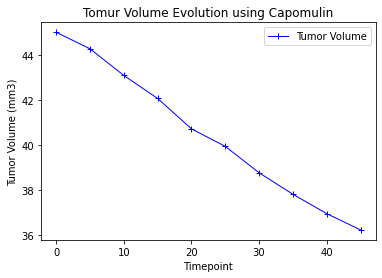

In [100]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
lp1 = mouse_merge[mouse_merge['Drug Regimen']=='Capomulin']
lp1 = lp1.groupby('Timepoint', as_index=False).mean()

plt.plot(lp1['Timepoint'], lp1['Tumor Volume (mm3)'], marker="+",color="blue", linewidth=1, label="Tumor Volume")
plt.title('Tumor Volume Evolution using Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.show()


Text(0, 0.5, 'Tumor Volume (mm3)')

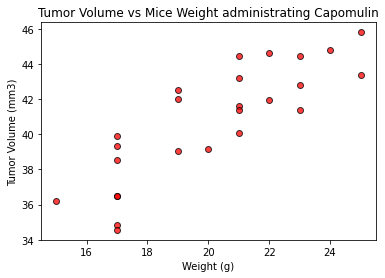

In [117]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

sp1 = mouse_merge[mouse_merge['Drug Regimen']=='Capomulin']
sp1 = sp1.groupby('Mouse ID', as_index=False).mean()
#sp1
x_values = sp1['Weight (g)']
y_values = sp1['Tumor Volume (mm3)']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.title('Tumor Volume vs Mice Weight administrating Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')


## Correlation and Regression

The regression equation is: y = 0.95x + 21.55
The correlation coefficient is: (0.8419363424694717, 1.322572243471279e-07)


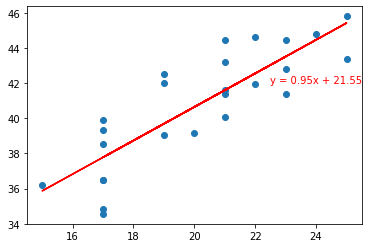

In [120]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The regression equation is: {line_eq}')
print(f'The correlation coefficient is: {st.pearsonr(x_values,y_values)}')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (22.5,42), fontsize=10, color='red')
plt.show()



51.645643927615026